<a href="https://colab.research.google.com/github/vdslab/hyperbolic-tree/blob/main/ipynb/visdata_top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [4]:
import csv
import pandas as pd
with open('/content/drive/MyDrive/Colab Notebooks/pre-judgit/IEEE VIS papers 1990-2020 - Main dataset.csv', 'r')as f:
    df = pd.read_csv(f)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
stem = PorterStemmer()
lem = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(word_tokenize(sentence.lower())):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [6]:
lemmatize_sentence('underlying')

['underlie']

In [ ]:
lemmatize_sentence(df['Abstract'][0])

['data-driven',
 'document',
 '(',
 'd3',
 ')',
 'be',
 'a',
 'novel',
 'representation-transparent',
 'approach',
 'to',
 'visualization',
 'for',
 'the',
 'web',
 '.',
 'rather',
 'than',
 'hide',
 'the',
 'underlying',
 'scenegraph',
 'within',
 'a',
 'toolkit-specific',
 'abstraction',
 ',',
 'd3',
 'enables',
 'direct',
 'inspection',
 'and',
 'manipulation',
 'of',
 'a',
 'native',
 'representation',
 ':',
 'the',
 'standard',
 'document',
 'object',
 'model',
 '(',
 'dom',
 ')',
 '.',
 'with',
 'd3',
 ',',
 'designer',
 'selectively',
 'bind',
 'input',
 'data',
 'to',
 'arbitrary',
 'document',
 'element',
 ',',
 'apply',
 'dynamic',
 'transforms',
 'to',
 'both',
 'generate',
 'and',
 'modify',
 'content',
 '.',
 'we',
 'show',
 'how',
 'representational',
 'transparency',
 'improve',
 'expressiveness',
 'and',
 'good',
 'integrates',
 'with',
 'developer',
 'tool',
 'than',
 'prior',
 'approach',
 ',',
 'while',
 'offer',
 'comparable',
 'notational',
 'efficiency',
 'and',
 

In [ ]:
documents = []
plot_titles = []
plot_ids = []
for i, (title, abstract) in enumerate(zip(df['Title'], df['Abstract'])):
    if type(abstract) == str:
        documents.append(' '.join(lemmatize_sentence(abstract)))
        plot_titles.append(title)
        plot_ids.append(i)

In [ ]:
from top2vec import Top2Vec
model = Top2Vec(documents, 
                workers = 0,
                umap_args = {'n_neighbors': 15,
                             'n_components': 5,
                             'metric': 'cosine',
                             'random_state': 42})

2022-08-01 09:56:56,381 - top2vec - INFO - Pre-processing documents for training
2022-08-01 09:56:57,836 - top2vec - INFO - Creating joint document/word embedding
2022-08-01 09:56:58,089 - top2vec - INFO - Creating lower dimension embedding of documents
2022-08-01 09:57:10,191 - top2vec - INFO - Finding dense areas of documents
2022-08-01 09:57:10,360 - top2vec - INFO - Finding topics


In [ ]:
model.topic_sizes

0     243
1     241
2     236
3     236
4     229
5     227
6     223
7     220
8     219
9     215
10    214
11    213
12    210
13    205
14    190
dtype: int64

In [ ]:
model.save('../../public/data/visdata_top2vec.model')

In [ ]:
for i, topics in enumerate(model.topic_words):
    print(f"topic {i}")
    print(f"{topics}")
    print(f"")

topic 0
['contribute' 'per' 'sub' 'compare' 'at' 'must' 'overview' 'ability'
 'actual' 'traditional' 'rendering' 'spatio' 'implement' 'without'
 'scenario' 'many' 'load' 'filtering' 'once' 'issue' 'the' 'content'
 'intelligence' 'reduce' 'vector' 'execution' 'significant' 'population'
 'them' 'set' 'causal' 'more' 'paradigm' 'tool' 'semantic' 'sparse'
 'scatterplots' 'particular' 'flexible' 'increasingly' 'accurate'
 'knowledge' 'framework' 'frequency' 'embed' 'response' 'word' 'quickly'
 'feature' 'efficiently']

topic 1
['energy' 'solve' 'fluid' 'indicate' 'current' 'variable' 'create'
 'limitation' 'mode' 'technique' 'effective' 'graphical' 'fact' 'possible'
 'scatter' 'survey' 'article' 'associate' 'member' 'typically' 'merge'
 'top' 'rather' 'shade' 'lead' 'discrete' 'embed' 'communication'
 'history' 'invariant' 'through' 'valuable' 'gain' 'multivariate' 'fit'
 'successfully' 'choose' 'sequence' 'few' 'be' 'tetrahedral' 'expert'
 'finding' 'type' 'early' 'despite' 'include' 'mani

In [ ]:
from nltk.corpus import stopwords
topic = []
for words, scores in zip(model.topic_words, model.topic_word_scores):
    tmp = {}
    for word, score in zip(words, scores):
        tmp[word] = score
    topic.append(tmp)

stopset = set(stopwords.words('english'))
for words in topic:
    for word in list(words.keys()):
        if word in stopset:
            words.pop(word)

In [ ]:
for words in topic:
    print('document' in words)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
for i, words in enumerate(topic):
    print(f"topic {i}")
    print(f"{words}")
    print(f"")

topic 0
{'contribute': 0.20534137, 'per': 0.20336258, 'sub': 0.18773592, 'compare': 0.15945031, 'must': 0.14933974, 'overview': 0.14472356, 'ability': 0.14405265, 'actual': 0.14153835, 'traditional': 0.14013149, 'rendering': 0.13707149, 'spatio': 0.13612022, 'implement': 0.13456006, 'without': 0.13153794, 'scenario': 0.13096829, 'many': 0.12922712, 'load': 0.1285681, 'filtering': 0.12746136, 'issue': 0.12655714, 'content': 0.12446292, 'intelligence': 0.122706614, 'reduce': 0.121029526, 'vector': 0.1157472, 'execution': 0.114112124, 'significant': 0.1140181, 'population': 0.11344307, 'set': 0.11196478, 'causal': 0.11178723, 'paradigm': 0.11027479, 'tool': 0.110238805, 'semantic': 0.10844155, 'sparse': 0.10788516, 'scatterplots': 0.10770356, 'particular': 0.10768832, 'flexible': 0.10741324, 'increasingly': 0.10634458, 'accurate': 0.1059191, 'knowledge': 0.10533426, 'framework': 0.10445389, 'frequency': 0.10434908, 'embed': 0.10298654, 'response': 0.10225957, 'word': 0.10165548, 'quickly'

/Users/taikitanaka/.pyenv/versions/3.7.13/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taikitanaka/.pyenv/versions/3.7.13/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8482 (\N{TRADE MARK SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


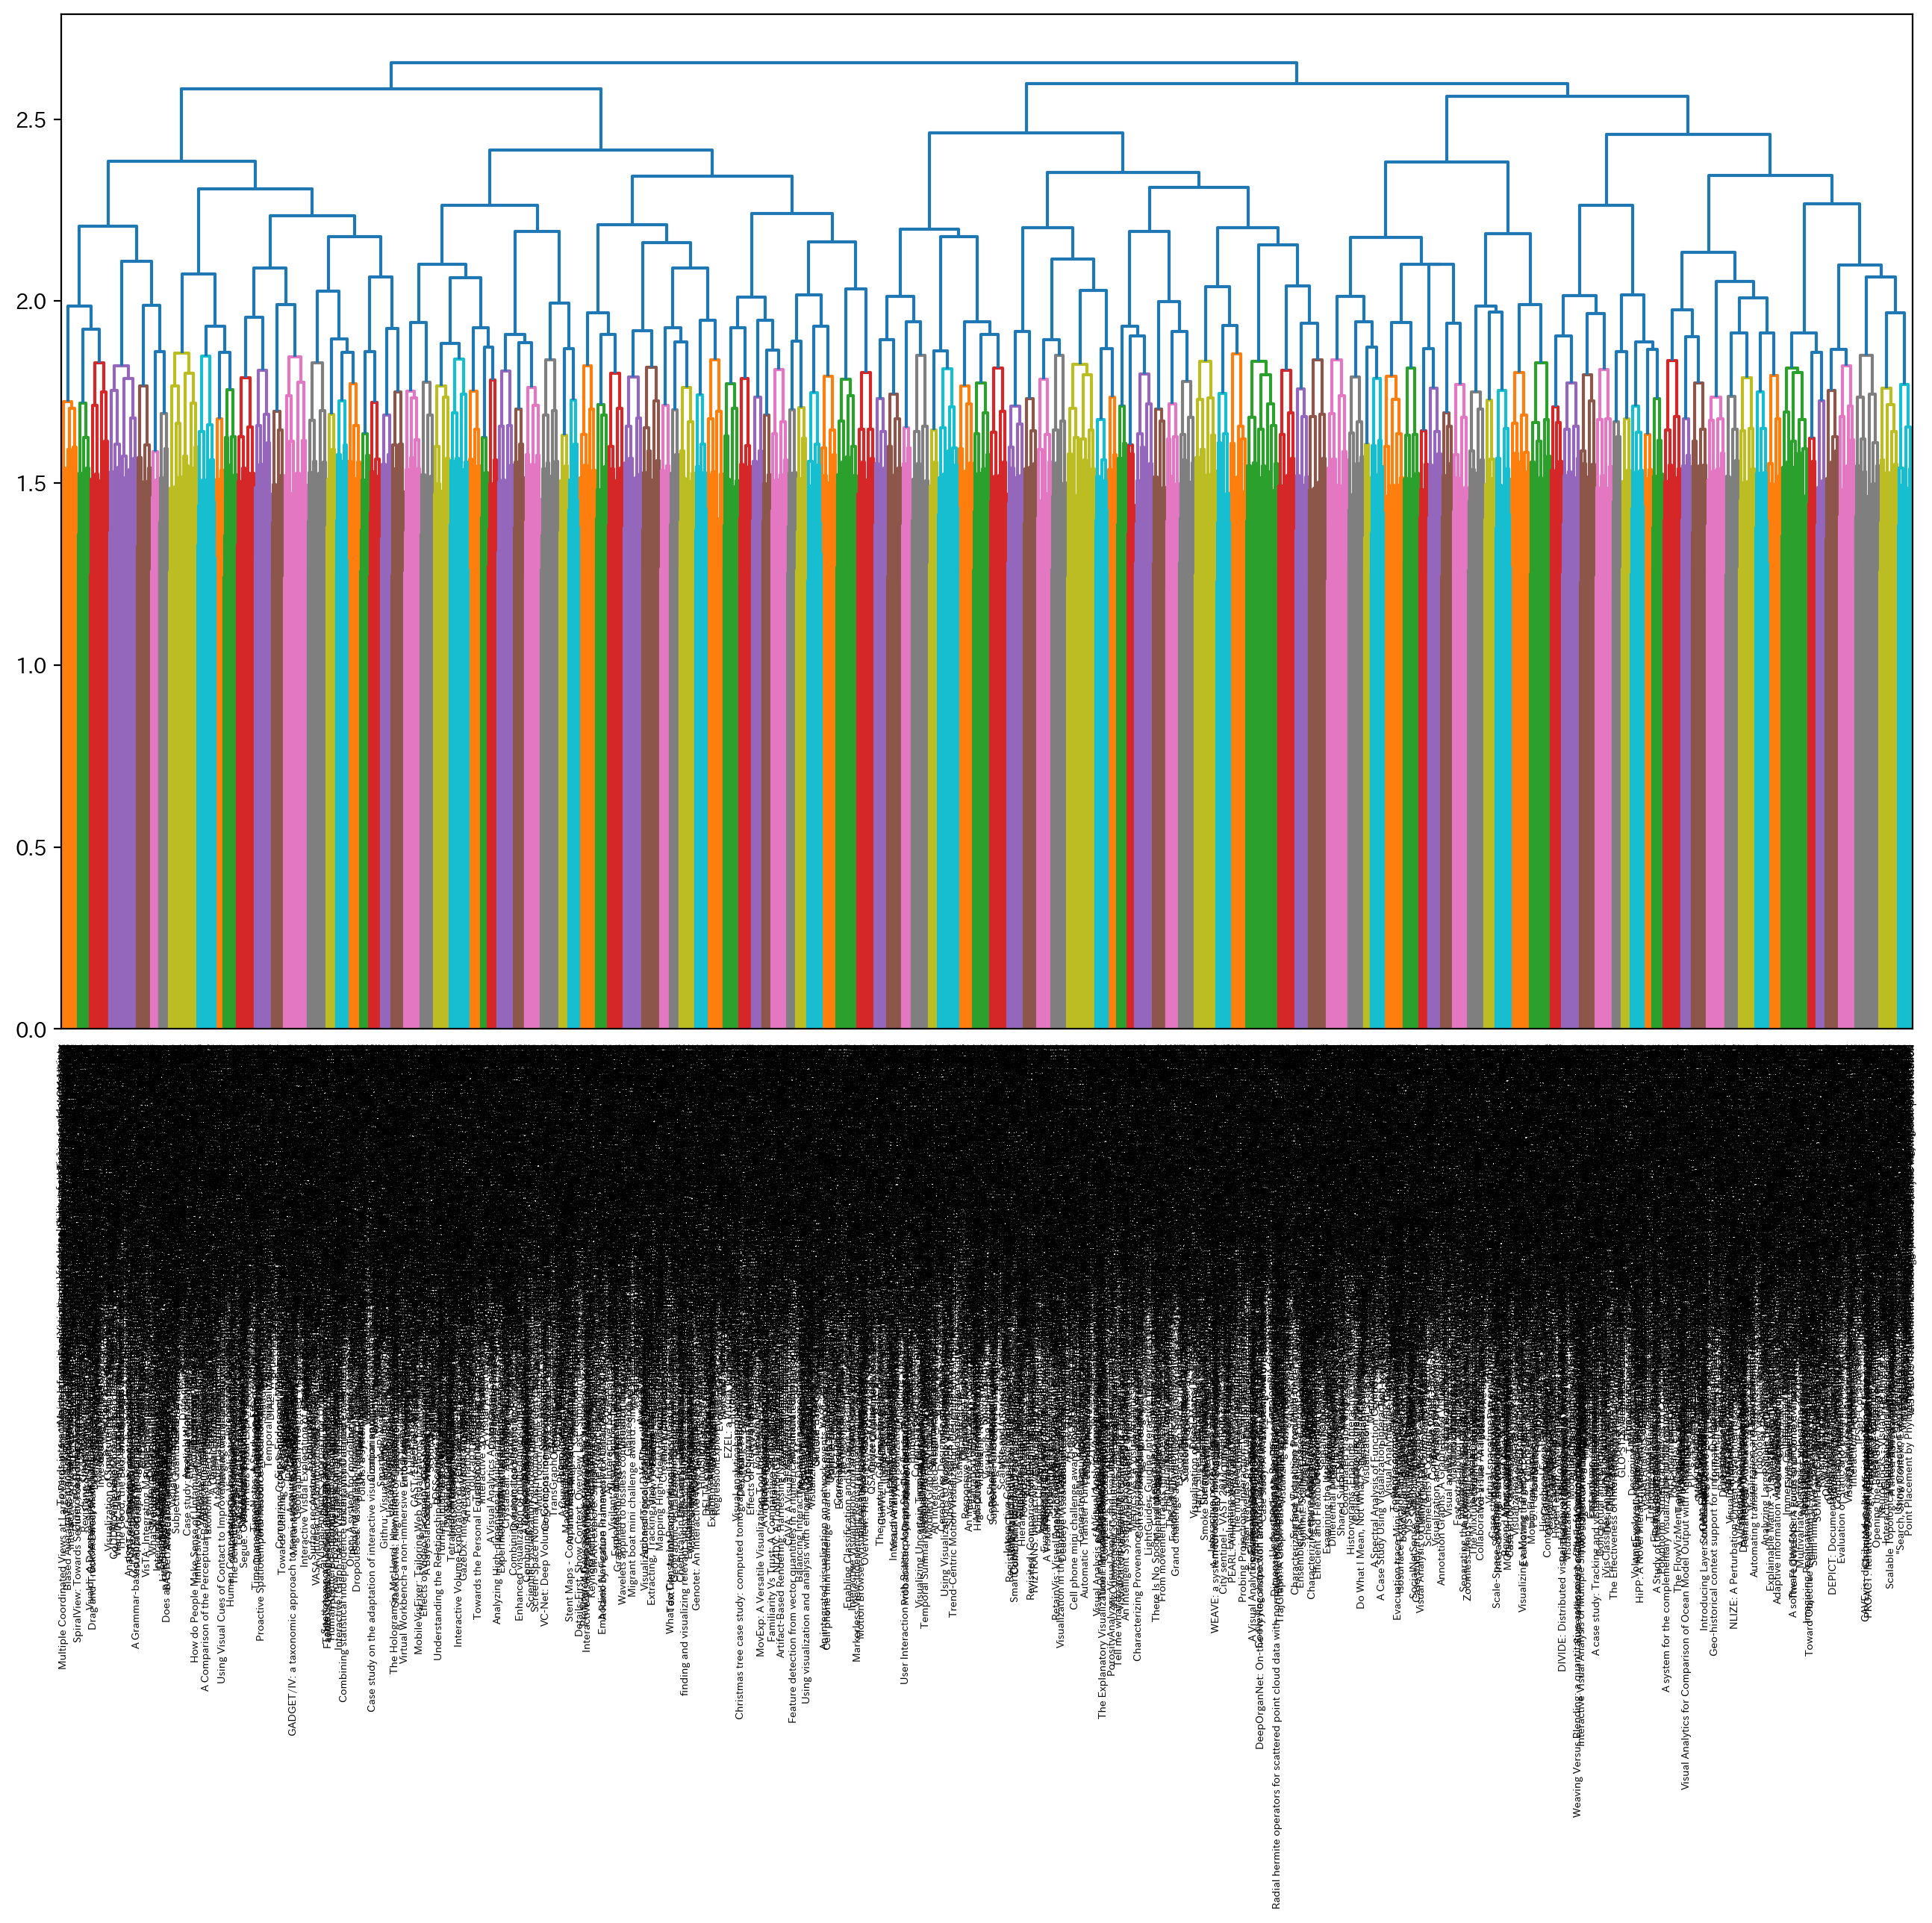

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(model.document_vectors, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=plot_titles)
plt.show()

In [ ]:
obj = []
for i, (id, title, document) in enumerate(zip(plot_ids, plot_titles, documents)):
    topvec = []
    topic_nums, topic_score, topic_words, word_scores = model.get_documents_topics(doc_ids=[i], num_topics = 1)
    for k in list(topic[topic_nums[0]].keys()):
        topvec.append({'word':k,
                    'score':float(topic[topic_nums[0]][k]*topic_score[0])})
    obj.append({'no':str(int(i)),
                'parent':'',
                'distance':0,
                'Title':title,
                'Abstract':document,
                'Conference':df['Conference'][id],
                'TopicScore':topvec})
    
for i in range(len(linkage_result)):
    obj.append({'no':str(len(linkage_result)+i+1),
                'parent':'',
                'distance':linkage_result[i][2],
                'Title':'',
                'Abstract':'',
                'AuthorKeywords':[],
                'Conference':'',
                'TopicScore':[]
                })

for i in range(len(obj)):
    if i % 1000 == 0 :
        print('running', i)
    for j in range(len(linkage_result)):
        if int(obj[i]['no']) == linkage_result[j][0] or int(obj[i]['no']) == linkage_result[j][1]:
            obj[i]['parent'] = str(len(linkage_result)+j+1)

running 0
running 1000
running 2000
running 3000
running 4000
running 5000
running 6000


In [ ]:
import json
with open('../../public/data/visdata220801.json', 'w', encoding='utf8')as f:
    json.dump(obj, f, indent=2, ensure_ascii=False)

# TF-IDFの計算

In [ ]:
for t in test:
    if len(t['child']) == 243:
        print(t['no'])

In [ ]:
test[6000]

{'no': '6000',
 'parent': '6398',
 'distance': 1.5268536342864631,
 'Title': '',
 'Abstract': '',
 'AuthorKeywords': [],
 'Conference': '',
 'TopicScore': [],
 'child': ['242', '1833', '2653', '3285', '1682', '2385', '1873', '1936'],
 'WordScore': [{'word': 'integrated', 'score': 0.005941516477373718},
  {'word': 'operator', 'score': 0.006416268709604784},
  {'word': 'particularly', 'score': 0.00540080393145909},
  {'word': 'visible', 'score': 0.005265284409464261},
  {'word': 'finally', 'score': 0.005167094804098927},
  {'word': 'hierarchical', 'score': 0.005141168876252019},
  {'word': 'general', 'score': 0.005951938856192395},
  {'word': 'recently', 'score': 0.005035776626059278},
  {'word': 'rule', 'score': 0.004900068443647619},
  {'word': 'merge', 'score': 0.005195734864789323},
  {'word': 'digital', 'score': 0.0048263530354514615},
  {'word': 'scatter', 'score': 0.005077763020155493},
  {'word': 'preserve', 'score': 0.005243487983958718},
  {'word': 'anatomical', 'score': 0.0048

In [ ]:
import copy
test = copy.deepcopy(obj)
for t in test:
    t['child'] = [t['no']]
for t in test:
    try:
        test[int(t['parent'])]['child'].append(t['no'])
    except:
        print(t)
for t in test:
    tmp = []
    for i in range(1, len(t['child'])):
        tmp += test[int(t['child'][i])]['child']
    if tmp != []:
        t['child'] = tmp

{'no': '6640', 'parent': '', 'distance': 2.654835655463882, 'Title': '', 'Abstract': '', 'AuthorKeywords': [], 'Conference': '', 'TopicScore': [], 'child': ['6640', '6638', '6639']}


In [ ]:
def tokenize(sentence):
    return sentence.split()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for i, t in enumerate(test):
    if i % 500 == 0:
        print(f'{i} did')
    corpus = []
    for c in t['child']:
        s = ''
        for w in test[int(c)]['TopicScore']:
            s += w['word'] + ' '
        corpus.append(s)

    vectorizer = TfidfVectorizer(tokenizer=tokenize, use_idf=True, smooth_idf=True, sublinear_tf=True)
    X = vectorizer.fit_transform(corpus)
    values = X.toarray()
    feature_names = vectorizer.get_feature_names_out()
    tmp_TfIdf = pd.DataFrame(values, columns = feature_names)

    word_dic = {}
    error_words = []
    for i, c in enumerate(t['child']):
        for w in test[int(c)]['TopicScore']:
            try:
                if w['word'] not in word_dic:
                    word_dic[w['word']] = w['score'] * tmp_TfIdf[w['word']][i]
                else:
                    word_dic[w['word']] += w['score'] * tmp_TfIdf[w['word']][i]
            except:
                if w['word'] not in error_words:
                    error_words.append(w['word'])
        
    tmp = []
    for k, v in word_dic.items():
        tmp.append({'word':k, 'score':v})
    t['WordScore'] = tmp

0 did
500 did
1000 did
1500 did
2000 did
2500 did
3000 did
3500 did
4000 did
4500 did
5000 did
5500 did
6000 did
6500 did


In [ ]:
error_words

[]

In [ ]:
for e in error_words:
    print(f'{tmp_TfIdf[e]}')

In [ ]:
with open('../../public/data/visdata20220905.json', 'w', encoding='utf8')as f:
    json.dump(test, f, indent=2, ensure_ascii=False)

In [ ]:
import csv
import pandas as pd
with open('/content/drive/MyDrive/Colab Notebooks/tdb/Tweets.csv', 'r')as f:
    df = pd.read_csv(f)

In [ ]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
documents = []
plot_titles = []
plot_ids = []
for i, (id, text) in enumerate(zip(df['textID'], df['text'])):
    if type(text) == str:
        documents.append(' '.join(lemmatize_sentence(text)))
        plot_ids.append(id)

In [ ]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
trainings = []
for id, text in zip(df['textID'], df['text']):
    if type(text) == str:
        trainings.append(TaggedDocument(lemmatize_sentence(text), id))

In [ ]:
doc2vec_model = Doc2Vec(trainings, epochs=30, min_alpha=1e-4, sample=1e-3, min_count=4, window=15, vector_size=50)

In [ ]:
callable(TaggedDocument)

True

In [ ]:
model = Top2Vec(documents,  
                embedding_model=doc2vec_model,
                use_embedding_model_tokenizer=True,
                split_documents=True,
                document_chunker='random')

ValueError: ignored

In [ ]:
from top2vec import Top2Vec
model = Top2Vec(documents, embedding_model=callable, embedding_model_path=doc2vec_model,
                umap_args = {'n_neighbors': 15,
                             'n_components': 5,
                             'metric': 'cosine',
                             'random_state': 5})

2022-05-30 22:16:38,381 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-30 22:16:39,450 - top2vec - INFO - Creating joint document/word embedding
2022-05-30 22:16:39,465 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-30 22:16:50,325 - top2vec - INFO - Finding dense areas of documents
2022-05-30 22:16:50,348 - top2vec - INFO - Finding topics


AxisError: ignored